# 1. Explain succinctly in your own words (but working with a ChatBot if needed)...

## 1.the difference between Simple Linear Regression and Multiple Linear Regression; and the benefit the latter provides over the former

Multiple Linear Regression is just a model of linear equation with the relationship of more than one x and y values represented by the equation:y = β0 + β1*x1 + β2*x2 + ⋯ + βn*xn

Simple Linear Regression is just a model of linear equation with the relationship of one x and one y value represented by the equation: y = β0 + β1*x

The benefit the latter provides over the former is that it captures more complex relationships by considering additional factors

## 2.the difference between using a continuous variable and an indicator variable in Simple Linear Regression; and these two linear forms

A continuous variable can take any value to represent the fluctuations of the graph in response to the variables taken into account.

An indicator variable only "represents categories" which change the regression line, either shifting up or down, and doesnt affect the slope.

Linear form with a continuous variable has the equation; y = β0 + β1*x 

Linear from with an indicator variable is similar to the one above but changes depending on the shift in regression line

## 3.the change that happens in the behavior of the model (i.e., the expected nature of the data it models) when a single indicator variable is introduced alongside a continuous variable to create a Multiple Linear Regression; and these two linear forms (i.e., the Simple Linear Regression versus the Multiple Linear Regression)

In [11]:
# Here's an example of how you can do this
import pandas as pd
import statsmodels.formula.api as smf

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url).fillna('None')

pokeaman['str8fyre'] = (pokeaman['Type 1']=='Fire').astype(int)
linear_model_specification_formula = \
'str8fyre ~ Attack*Legendary + Defense*I(Q("Type 2")=="None") + C(Generation)'
log_reg_fit = smf.logit(linear_model_specification_formula, data=pokeaman).fit()
log_reg_fit.summary()

Optimization terminated successfully.
         Current function value: 0.228109
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               str8fyre   No. Observations:                  800
Model:                          Logit   Df Residuals:                      788
Method:                           MLE   Df Model:                           11
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                 0.05156
Time:                        22:34:30   Log-Likelihood:                -182.49
converged:                       True   LL-Null:                       -192.41
Covariance Type:            nonrobust   LLR p-value:                   0.04757
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -3.2644      0.714     -4.572      0.000      -4.664      -1.865
Legendary[T.True]                            4.3478      2.179      1.996      0.046       0.078       8.618
I(Q("Type 2") == "None")[T.True]             1.5432      0.853      1.810      0.070      -0.128       3.215
C(Generation)[T.2]                          -0.0574      0.468     -0.123      0.902      -0.975       0.861
C(Generation)[T.3]                          -0.6480      0.466     -1.390      0.164      -1.561       0.265
C(Generation)[T.4]                          -0.8255      0.545     -1.516      0.130      -1.893       0.242
C(Generation)[T.5]                          -0.5375      0.449     -1.198      0.231      -1.417       0.342
C(Generation)[T.6]                           0.3213      0.477      0.673      0.501      -0.614       1.257
Attack                                       0.0172      0.006      3.086      0.002       0.006       0.028
Attack:Legendary[T.True]                    -0.0365      0.019     -1.884      0.060      -0.074       0.001
Defense                                     -0.0098      0.008     -1.247      0.213      -0.025       0.006
Defense:I(Q("Type 2") == "None")[T.True]    -0.0197      0.012     -1.651      0.099      -0.043       0.004
============================================================================================================
"""

Adding indicator variable changes the intercept while still maintaining the slope that was given by the continuous variable.

Simple Linear Regression with one continuous variable is 𝑦 = 𝛽0 + 𝛽1*𝑥. With an additional indicator in Multiple Linear Regression, the form becomes 𝑦 = 𝛽0 + 𝛽1*𝑥 + 𝛽2*𝑧, where z is the indicator variable.

## 4.the effect of adding an interaction between a continuous and an indicator variable in Multiple Linear Regression models; and this linear form

It lets the the model estimate a different slope for the continuous variable in each category
Represented by the equation; 𝑦 = 𝛽0 + 𝛽1*𝑥 + 𝛽2*𝑧 + 𝛽3*(x * z)

## 5.the behavior of a Multiple Linear Regression model (i.e., the expected nature of the data it models) based only on indicator variables derived from a non-binary categorical variable; this linear form; and the necessarily resulting binary variable encodings it utilizes

It captures the effect of each category by using binary dummy variables
Represented by the equation; y = β0 + β1D1 + β2D2 + ⋯ + βk−1*Dk−1, where Di are the dummy variables

# 2. Explain in your own words (but working with a ChatBot if needed) what the specific (outcome and predictor) variables are for the scenario below; whether or not any meaningful interactions might need to be taken into account when predicting the outcome; and provide the linear forms with and without the potential interactions that might need to be considered

## 1.Explain how to use these two formulas to make predictions of the outcome, and give a high level explaination in general terms of the difference between predictions from the models with and without the interaction

Without Interactions: Sales = β0 + β1(TV Budget) + β2(Online Budget)
In this form, each advertising budget contributes independently to sales. The effect of the TV budget is constant, regardless of the online budget, and vice versa.

With Interactions: Sales = β0 + β1(TV Budget) + β2(Online Budget) + β3(TV Budget×Online Budget) 
Here, the interaction term(TV Budget×Online Budget)(TV Budget×Online Budget) allows for the combined effect of both budgets, meaning the impact of one advertising type on sales can vary depending on the level of the other.

Assuming that every kind of advertising has a separate impact on sales, the additive model offers a simple forecast. However, the potential collaboration between the two budgets is captured by the interactive model, whereby lavish spending on both might result in a greater sales gain than each sort of advertising alone. If both forms of advertising have an impact on one another, this interaction may provide a more accurate forecast.

## 2.Explain how to update and use the implied two formulas to make predictions of the outcome if, rather than considering two continuous predictor variables, we instead suppose the advertisement budgets are simply categorized as either "high" or "low" (binary variables)

Without Interaction: Sales = 𝛽0 + 𝛽1(TV High) + 𝛽2(Online High)
TV High and  Online High are binary variables (1 if high, 0 if low). This model predicts an increase in sales if the TV or online budget is high, without considering a combined effect.

With Interaction: Sales = β0 + β1(TV High) + β2(Online High) + β3(TV High×Online High)
This model includes an interaction term (TV High×Online High)(TV High×Online High), capturing any added effect on sales when both budgets are high. The interaction term adjusts the prediction to account for combined high spending.

The additive model posits that each "high" or "low" budget level has a separate impact on sales in the binary scenario. The situation where two high budgets might have a combined effect—for example, a more significant rise in sales than either high budget alone would produce—is captured by the interactive model. If the interaction has a big effect on sales, this can give a more accurate forecast.

# 3. Use smf to fit multiple linear regression models to the course project dataset from the canadian social connection survey

## 1.for an additive specification for the linear form based on any combination of a couple continuous, binary, and/or categorical variables and a CONTINUOUS OUTCOME varaible

## 2.for a synertistic interaction specification for the linear form based on any combination of a couple continuous, binary, and/or categorical variables

## 3.and interpretively explain your linear forms and how to use them to make predictions

## 4.and interpret the statistical evidence associated with the predictor variables for each of your model specifications

## 5. and finally use plotly to visualize the data with corresponding "best fit lines" for a model with continuous plus binary indicator specification under both (a) additive and (b) synergistic specifications of the linear form (on separate figures), commenting on the apparent necessity (or lack thereof) of the interaction term for the data in question

- Step 1: Load and Explore the CSCS Data
Ensure you have access to the dataset and have defined your continuous outcome and predictor variables (continuous, binary, and categorical). Let’s assume the outcome variable is a continuous measure like "social connectedness score."

- Step 2: Define Additive and Interaction Model Specifications
1. Additive Model Specification: In an additive model, each predictor variable contributes independently to the outcome.

Here:
age and income are continuous predictors.
region is a categorical predictor.
social_activity is a binary indicator (e.g., 1 if socially active, 0 if not).

2. Interaction (Synergistic) Model Specification: The interaction model includes terms that allow the effects of predictors to depend on each other.

Here, we introduce interaction terms:
age * income: Allows the effect of age on social connectedness to vary based on income.
C(region) * social_activity: Accounts for potential interaction between region and social activity status.

- Step 3: Interpret Statistical Evidence
For each model, examine the summary output:

Coefficients: Reflect the strength and direction of the relationships.
p-values: Show the statistical significance of each predictor (a low p-value indicates strong evidence that the predictor affects the outcome).
R-squared: Indicates the proportion of variability in the outcome explained by the model.
In the additive model, the coefficients tell us the independent impact of each predictor on the connectedness score. For instance, if income has a positive and statistically significant coefficient, it means higher income is associated with a higher connectedness score, regardless of other factors.
In the interaction model, significant interaction terms (e.g., age:income) suggest that the effect of age on connectedness score depends on income. If both C(region) and social_activity have a significant interaction, it indicates that the region modifies the effect of social activity status on connectedness.

- Step 4: Visualize Using Plotly
Interpretation of Visualization
1. Additive Model (Figure A): The trendline fits across all data points regardless of the binary grouping of social activity, suggesting a uniform effect of age on connectedness.
2. Interaction Model (Figure B): Separate trendlines for each social activity group allow the slope for age to differ based on social activity status. This can illustrate the necessity of an interaction term if the slopes vary significantly between groups, suggesting that age’s effect on connectedness changes based on social activity.



By visualizing both models, you can observe whether the interaction term is essential. If there’s no noticeable difference between trendlines in Figure B, the interaction term might not be necessary. However, if the trendlines diverge, the interaction term is likely justified.

#### Step 2

In [ ]:
import statsmodels.formula.api as smf

# Example formula with continuous, binary, and categorical predictors
model_additive = smf.ols(formula='connectedness_score ~ age + income + C(region) + social_activity', data=cscs_data).fit()
model_additive.summary()


In [ ]:
# Model with interaction terms
model_interaction = smf.ols(formula='connectedness_score ~ age * income + C(region) * social_activity', data=cscs_data).fit()
model_interaction.summary()

#### Step 4: Visualize Using Plotly

In [ ]:
import plotly.express as px
import numpy as np

# Assuming "age" is a continuous predictor and "social_activity" is binary
fig_additive = px.scatter(cscs_data, x='age', y='connectedness_score', color='social_activity',
                          trendline="ols", trendline_scope="overall", title="Additive Model")
fig_additive.show()


In [ ]:
fig_interaction = px.scatter(cscs_data, x='age', y='connectedness_score', color='social_activity',
                             trendline="ols", trendline_scope="group", trendline_color_override="red",
                             title="Interaction Model with Age and Social Activity Interaction")
fig_interaction.show()


# 4. Explain the apparent contradiction between the factual statements regarding the fit below that "the model only explains 17.6% of the variability in the data" while at the same time "many of the coefficients are larger than 10 while having strong or very strong evidence against the null hypothesis of 'no effect'"

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [2]:
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        20:59:37   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Limited Explanatory Power:

- The low R-squared value implies that, despite the significant predictors, the model does not capture much of the variability in HP.
- This could be due to the exclusion of other important variables that affect HP, leading to a model that, while statistically valid, lacks comprehensive explanatory power.

Significance Reflects Reliability, Not Magnitude of Effect:

- Statistical significance indicates that the observed relationships are unlikely to be due to chance, but it does not measure the strength or practical importance of these relationships.
- A predictor can have a statistically significant effect with a large coefficient, yet still explain only a small portion of the variance in the dependent variable if other influential factors are missing from the model.

The model's low R-squared value alongside significant coefficients underscores the importance of distinguishing between statistical significance and the overall explanatory power of a model. It highlights the need for a comprehensive approach in model building, ensuring that all relevant factors are considered to accurately capture the variability in the dependent variable.

# 5. Discuss the following (five cells of) code and results with a ChatBot and based on the understanding you arrive at in this conversation explain what the following (five cells of) are illustrating

#### Cell 1

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,str8fyre
370,338,Solrock,Rock,Psychic,70,95,85,55,65,70,3,False,0
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,1
242,224,Octillery,Water,None,75,105,75,105,75,45,2,False,0
661,600,Klang,Steel,None,60,80,95,70,85,50,5,False,0
288,265,Wurmple,Bug,None,45,45,35,20,30,20,3,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,471,Glaceon,Ice,None,65,60,110,130,95,65,4,False,0
243,225,Delibird,Ice,Flying,45,55,45,65,45,75,2,False,0
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,0
117,109,Koffing,Poison,None,40,65,95,60,45,35,1,False,0


- Purpose: This cell prepares the data for training and testing the models.
1. The dataset is split into a training set (pokeaman_train) and a test set (pokeaman_test), with each set holding 50% of the data.
2. NaN values in the "Type 2" column are replaced with "None" to avoid errors in the model caused by missing values.
3. np.random.seed(130) ensures reproducibility of the random split.
- Illustration: Demonstrates data preprocessing and creating a train-test split, a fundamental step for evaluating model performance on unseen data.

#### Cell 2

In [15]:
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        22:35:38   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Purpose: This cell specifies and fits a simple linear regression model (model3) with HP as the outcome variable and Attack and Defense as predictor variables.
- Illustration: Shows how a basic linear model can be created using only two predictors, focusing on a limited set of features to predict the HP variable. The summary output from model3_fit.summary() will provide insights into the coefficients, statistical significance, R-squared value, and overall model performance on the training data.

#### Cell 3

In [16]:
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y, yhat_model3)[0,1]**2)

'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738


- Purpose: This cell evaluates the performance of model3 on both the training set (in-sample) and the test set (out-of-sample).
1. The in-sample R-squared (from model3_fit.rsquared) measures how well the model fits the training data.
2. The out-of-sample R-squared (from np.corrcoef(y, yhat_model3)[0,1]**2) assesses the model's predictive performance on the test set.
- Illustration: Highlights the difference between in-sample and out-of-sample R-squared values, which can reveal potential overfitting if in-sample performance is significantly better than out-of-sample performance.

#### Cell 4

In [17]:
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     4.764
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           4.23e-21
Time:                        22:35:44   Log-Likelihood:                -1738.6
No. Observations:                 400   AIC:                             3603.
Df Residuals:                     337   BIC:                             3855.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          521.5715    130.273      4.004      0.000     265.322     777.821
Legendary[T.True]                                                   -6.1179      2.846     -2.150      0.032     -11.716      -0.520
Attack                                                              -8.1938      2.329     -3.518      0.000     -12.775      -3.612
Attack:Legendary[T.True]                                         -1224.9610    545.105     -2.247      0.025   -2297.199    -152.723
Defense                                                             -6.1989      2.174     -2.851      0.005     -10.475      -1.923
Defense:Legendary[T.True]                                         -102.4030     96.565     -1.060      0.290    -292.350      87.544
Attack:Defense                                                       0.0985      0.033      2.982      0.003       0.034       0.164
Attack:Defense:Legendary[T.True]                                    14.6361      6.267      2.336      0.020       2.310      26.963
Speed                                                               -7.2261      2.178     -3.318      0.001     -11.511      -2.942
Speed:Legendary[T.True]                                            704.8798    337.855      2.086      0.038      40.309    1369.450
Attack:Speed                                                         0.1264      0.038      3.351      0.001       0.052       0.201
Attack:Speed:Legendary[T.True]                                       5.8648      2.692      2.179      0.030       0.570      11.160
Defense:Speed                                                        0.1026      0.039      2.634      0.009       0.026       0.179
Defense:Speed:Legendary[T.True]                                     -6.9266      3.465     -1.999      0.046     -13.742      -0.111
Attack:Defense:Speed                                                -0.0016      0.001     -2.837      0.005      -0.003      -0.001
Attack:Defense:Speed:Legendary[T.True]                              -0.0743      0.030     -2.477      0.014      -0.133      -0.015
Q("Sp. Def")                                                        -5.3982      1.938     -2.785      0.006      -9.211      -1.586
Legendary[T.True]:Q("Sp. Def")                                    -282.2496    126.835     -2.225      0.027    -531.738     -32.761
Attack:Q("Sp. Def")                                                  0.1094      0.034      3.233      0.001       0.043       0.176
Attack:Legendary[T.True]:Q("Sp. Def")                               12.6503      5.851      2.162      0.031       1.141      24.160
Defense:Q("Sp. Def")    

- Purpose: This cell specifies and fits a more complex regression model (model4) with multiple interaction terms across several predictors (Attack, Defense, Speed, Legendary, Sp. Def, Sp. Atk).
1. This complex formula aims to capture the interactions among these variables, potentially leading to a more nuanced model of HP.
2. The comment warns against adding too many high-dimensional interactions, which would create an unmanageably large model.
- Illustration: Demonstrates the creation of a high-complexity model with multiple interaction terms. This model aims to capture more complex relationships, but there is also the risk of overfitting due to the high number of interaction terms.

### Cell 5

In [18]:
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y, yhat_model4)[0,1]**2)

'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873


- Purpose: This cell evaluates model4 on both the training set (in-sample) and the test set (out-of-sample) in the same way as in Cell 3.
- Illustration: By comparing the in-sample and out-of-sample R-squared values for the complex model, this cell illustrates the potential overfitting that can arise when including numerous interaction terms. A large drop in out-of-sample performance compared to in-sample would indicate overfitting.

#### Summary of What These Cells Illustrate
These cells collectively illustrate a typical workflow for building and evaluating regression models, showing both simple and complex specifications:

1. Data Preparation and Splitting: Ensures data is ready for modeling and allows for proper model evaluation using a train-test split.
2. Model Specification: Starts with a basic model (Cell 2) and progresses to a complex model with multiple interaction terms (Cell 4).
3. Performance Evaluation: Calculates and compares in-sample and out-of-sample R-squared values for both models (Cells 3 and 5) to assess predictive power and the risk of overfitting.

By analyzing both a simple and complex model, this example highlights the trade-off between model complexity and generalizability, helping illustrate how adding more features and interactions can increase the risk of overfitting.

# 6. Work with a ChatBot to understand how the model4_linear_form (linear form specification of model4) creates new predictor variables as the columns of the so-called "design matrix" model4_spec.exog (model4_spec.exog.shape) used to predict the outcome variable model4_spec.endog and why the so-called multicollinearity in this "design matrix" (observed in np.corrcoef(model4_spec.exog)) contribues to the lack of "out of sample" generalization of predictions from model4_fit; then, explain this consisely in your own works

1. Model4 Linear Form (model4_linear_form):

- The model4_linear_form specification includes interaction terms among multiple predictors: Attack, Defense, Speed, Legendary, Sp. Def, and Sp. Atk.
- When fitting a model with this specification, the code generates a design matrix (model4_spec.exog), where each column represents a predictor (or interaction term) in the model.
- Interaction terms multiply predictors together (e.g., Attack * Defense * Speed), leading to many new columns in this design matrix.
- The result is a high-dimensional matrix with potentially highly correlated (or redundant) columns due to the interactions, leading to multicollinearity.


2. Multicollinearity in the Design Matrix:

- Multicollinearity occurs when two or more predictors in the design matrix are highly correlated, making it difficult to determine their individual effects on the outcome.
- This can be observed by checking correlations in the design matrix (e.g., np.corrcoef(model4_spec.exog)) and by looking at the Condition Number from the model summary, which indicates the degree of multicollinearity.
- High multicollinearity (indicated by an extremely high condition number) can lead to unstable coefficients, where small changes in the data cause large fluctuations in coefficient estimates, thus reducing the model's ability to generalize to new data (i.e., poor "out-of-sample" performance).


3. Condition Number and Model Stability:

- The Condition Number is a measure of how sensitive the model is to slight changes in the predictors, with higher values indicating more severe multicollinearity.
- Without centering and scaling, model4_fit has a very high Condition Number (e.g., 10^12to 10^15), indicating that the model is extremely sensitive to predictor variations, making the model prone to poor generalization.
- This issue is somewhat alleviated in model3_fit by centering and scaling, which reduces the Condition Number to 1.66, suggesting minimal multicollinearity and more stability.


#### Impact of Centering and Scaling

4. Centering and Scaling (model4_linear_form_CS):

- By centering and scaling the continuous predictors (e.g., scale(center(Attack))), each predictor is adjusted to have a mean of zero and a standard deviation of one, which can reduce multicollinearity and make the model more stable.
- After centering and scaling, the Condition Number for model3_center_scale_fit becomes low (around 1.66), but model4_CS_fit still has a high Condition Number (around 10^15), indicating that interactions among multiple variables contribute to high multicollinearity that centering and scaling alone cannot resolve.

# 7. Discuss with a ChatBot the rationale and principles by which model5_linear_form is extended and developed from model3_fit and model4_fit; model6_linear_form is extended and developed from model5_linear_form; and model7_linear_form is extended and developed from model6_linear_form; then, explain this breifly and consisely in your own words

### Model Progression Overview


1. model3 to model4: Increasing Complexity with Interactions

- model3: A simple linear regression using only Attack and Defense as predictors.
- model4: Extends model3 by adding interactions among several predictors (e.g., Attack, Defense, Speed, Legendary, Sp. Def, and Sp. Atk).
- Rationale: Adding interactions allows the model to capture potential combined effects of variables, which could improve predictive accuracy. However, the high complexity may lead to multicollinearity and poor out-of-sample performance, as seen in the high Condition Number.


2. model5: Adding Relevant Predictors Without Excessive Interactions

- Specification: Includes additional main effects (e.g., Speed, Legendary, Sp. Def, Sp. Atk, Generation, and Type 1 and Type 2) but avoids high-order interactions.
- Rationale: This approach incorporates a broader range of features without the computational expense and instability associated with complex interaction terms. Adding categorical variables like Generation and Type captures group-level variations, potentially boosting interpretability and predictive performance without over-complicating the model.

3. model6: Refining Predictors Based on Statistical Significance

- Specification: Focuses on a subset of predictors from model5 that showed significance (e.g., Attack, Speed, Sp. Def, Sp. Atk, and indicators for Type 1 == "Normal" or "Water" and Generation 2 and 5).
- Rationale: Removing nonsignificant predictors simplifies the model, helping to reduce multicollinearity and avoid overfitting. This refinement is based on empirical evidence, retaining only variables that appear to have a significant effect on HP.


4. model7: Adding Selected Interactions for Key Predictors

- Specification: Includes interactions among the primary continuous predictors (Attack, Speed, Sp. Def, Sp. Atk), along with selected binary indicators for Type and Generation.
- Rationale: Adding limited interactions among the most relevant continuous predictors allows the model to account for complex relationships where these variables jointly influence HP. This targeted interaction approach balances model complexity with interpretability.


5. model7 with Centering and Scaling (model7_CS)

- Specification: Uses centered and scaled versions of continuous predictors to reduce multicollinearity while preserving indicator variables for categorical effects.
- Rationale: Centering and scaling reduce the Condition Number from over 2 trillion to a manageable 15.4, which stabilizes coefficient estimates and improves the model’s ability to generalize.

# 8. Work with a ChatBot to write a for loop to create, collect, and visualize many different paired "in sample" and "out of sample" model performance metric actualizations (by not using np.random.seed(130) within each loop iteration); and explain in your own words the meaning of your results and purpose of this demonstration

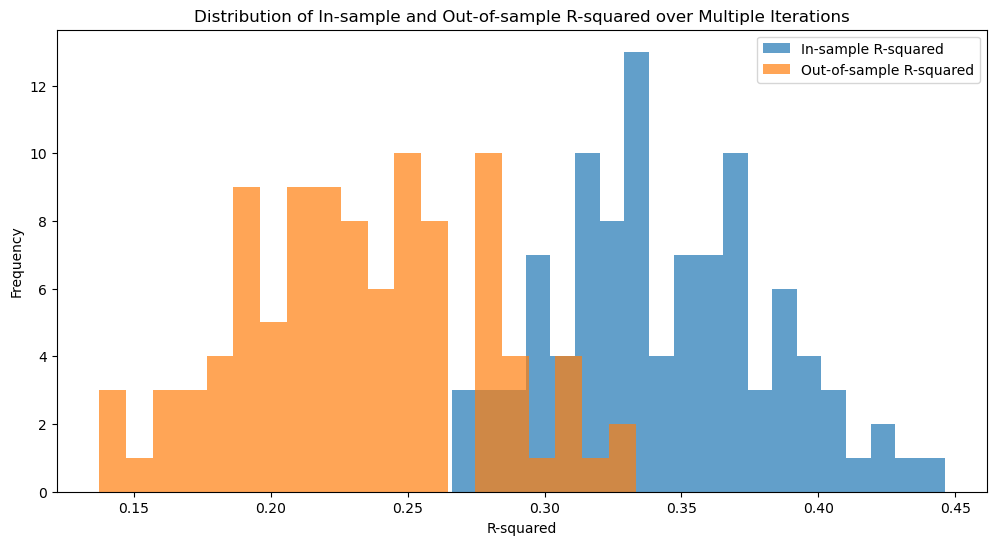

In [21]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the Pokémon dataset
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url)
pokeaman.fillna('None', inplace=True)  # Replace NaNs in 'Type 2' with 'None'

# Initialize lists to collect R-squared values
in_sample_r_squared = []
out_of_sample_r_squared = []

# Number of iterations for repeated train-test splits
iterations = 100

for _ in range(iterations):
    # Split data without setting a random seed
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=0.5)
    
    # Specify and fit model (using model7 example linear form)
    model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
    model_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
    model_fit = model_spec.fit()
    
    # Predict and calculate in-sample R-squared
    in_sample_r_squared.append(model_fit.rsquared)
    
    # Predict and calculate out-of-sample R-squared
    y_test = pokeaman_test.HP
    yhat_out_of_sample = model_fit.predict(pokeaman_test)
    out_of_sample_r_squared.append(np.corrcoef(y_test, yhat_out_of_sample)[0,1]**2)

# Convert results to DataFrame for plotting
results_df = pd.DataFrame({
    'In-sample R-squared': in_sample_r_squared,
    'Out-of-sample R-squared': out_of_sample_r_squared
})

# Visualization of in-sample and out-of-sample R-squared distributions
plt.figure(figsize=(12, 6))
plt.hist(results_df['In-sample R-squared'], bins=20, alpha=0.7, label='In-sample R-squared')
plt.hist(results_df['Out-of-sample R-squared'], bins=20, alpha=0.7, label='Out-of-sample R-squared')
plt.xlabel('R-squared')
plt.ylabel('Frequency')
plt.title('Distribution of In-sample and Out-of-sample R-squared over Multiple Iterations')
plt.legend()
plt.show()


#### Explanation of Results

By running this code, you will see histograms showing the distribution of in-sample and out-of-sample R-squared values across different train-test splits. Here’s the purpose and meaning behind this demonstration:

1. Stability and Robustness: The spread of in-sample and out-of-sample R-squared values shows how stable the model is under varying train-test splits. A narrow spread in out-of-sample R-squared values indicates robustness, while a wide spread suggests that the model may be sensitive to the specific data it’s trained on.

2. In-sample vs. Out-of-sample Performance: Consistently higher in-sample R-squared values compared to out-of-sample R-squared values can indicate overfitting, where the model performs well on training data but poorly on unseen data.

3. Model Generalizability: If the out-of-sample R-squared values cluster close to the in-sample values, it suggests that the model generalizes well to new data.

#### Purpose of the Demonstration

The demonstration assesses model reliability by examining how performance metrics fluctuate across different data splits. This method provides insight into the model’s sensitivity to changes in the training data, which is valuable for understanding the model's expected performance in real-world applications where new data is unlikely to match the training set exactly.

# 9. Work with a ChatBot to understand the meaning of the illustration below; and, explain this in your own words

#### Code Structure and Process

1. Original Model (model6 and model7) Evaluation:

- Both model6 and model7 were originally trained on the entire dataset. The code captures their in-sample R-squared (using the training set) and out-of-sample R-squared (using the test set) for reference.
- These scores provide a baseline for comparison to see how much the training set composition affects generalization.


2. Training on Generation 1 Only (gen1_predict_future):

- New models based on model6 and model7 are trained exclusively on Generation 1 Pokémon data.
- In-sample R-squared: This measures the model’s fit on Generation 1 data.
- Out-of-sample R-squared: The models are tested on Pokémon from Generations 2 through 6 to evaluate how well they generalize to new generations. This highlights whether patterns learned from Generation 1 hold for subsequent generations.


3. Training on Generations 1 to 5 (gen1to5_predict_future):

- Additional models are created by training on Generations 1 through 5, excluding Generation 6.
- In-sample R-squared: Evaluates fit on Generations 1–5.
- Out-of-sample R-squared: The models are tested specifically on Generation 6 to see if they generalize to the newest generation.


#### Interpretation of Results

- Generalization Across Generations:

a. High in-sample R-squared but low out-of-sample R-squared indicates that the model may not generalize well to Pokémon from different generations. This often occurs if characteristics of Pokémon vary substantially from generation to generation.
b. A smaller gap between in-sample and out-of-sample R-squared suggests that the model generalizes better, meaning that learned relationships are applicable across different generations.


- Training on Multiple Generations:

a. Models trained on a broader range of data (Generations 1–5) generally perform better on out-of-sample data from Generation 6, indicating that exposure to a variety of patterns enhances generalizability.
b. Conversely, models trained solely on Generation 1 may struggle to predict later generations accurately, suggesting that characteristics of Pokémon change over time, or new data introduces patterns not present in Generation 1.


#### Purpose of the Demonstration

- This illustration explores predictive generalizability:

1. Single vs. Multiple Generations: Comparing models trained on single vs. multiple generations shows the importance of a diverse training set for capturing a range of characteristics.
2. Evaluating Evolution in Data: By testing models on new data from different generations, this approach reveals whether underlying relationships remain stable or evolve over time.

# ChatGPT Summary

Understanding Model Types and Variables:

We started by discussing the difference between simple and multiple linear regression models, focusing on how adding more predictors can improve model explanation but may also increase complexity.
We explored the effects of continuous and indicator variables in regression and how interactions between predictors influence the model. Including an interaction term allows the model to capture combined effects, which can improve predictions when variables influence each other.
Building and Evaluating Models Using the Pokémon Dataset:

Using the Pokémon dataset, we built different models (model3 to model7) that progressively added predictors and interactions.
We discussed design matrices and how complex models with numerous interactions could lead to multicollinearity, causing instability in predictions. High Condition Numbers in these models highlighted this issue, and centering and scaling the data helped mitigate multicollinearity to some extent.
Assessing Model Stability with Iterative Train-Test Splits:

We ran a loop to fit models on randomly split train-test sets, omitting a fixed seed to introduce variability. By measuring in-sample and out-of-sample R-squared values across iterations, we visualized the model’s robustness.
The variability in performance metrics illustrated how sensitive the model was to different splits, highlighting potential overfitting if in-sample performance consistently exceeded out-of-sample performance.
Cross-Generational Generalization:

We evaluated models trained on specific Pokémon generations (e.g., Generation 1 or Generations 1–5) to see how well they predicted on other generations, such as Generation 6. This approach aimed to test the model’s ability to generalize to future data.
Models trained on more generations (1–5) performed better on Generation 6, indicating that more representative data improves generalizability. Models trained on Generation 1 alone struggled with later generations, suggesting that Pokémon characteristics vary across generations.
Key Insights and Purpose:

The progression from simple to complex models highlighted the balance between capturing detailed relationships and maintaining stability and interpretability. The importance of evaluating in-sample and out-of-sample performance was emphasized, as it reveals whether a model generalizes well or overfits.
The analysis demonstrated the need for diverse training data to predict future data accurately. This cross-generational testing illustrated that broader training data helps the model generalize better to new data.

### Final Summary
Overall, the conversation illustrated a methodical approach to building, refining, and interpreting linear regression models with practical insights into the effects of model complexity, multicollinearity, robustness, and the importance of representative training data for reliable predictions. The key takeaway was that achieving a balance between capturing complex relationships and ensuring generalizability is essential for building robust predictive models.

# ChatGPT Convo Link

https://chatgpt.com/share/67367d16-3570-8006-8a5c-104fb7b0dc2d